# Ashrut Alok Arora
# 210968206
# Week 5

## Q1)

### Function for gen time series data

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN

def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave1+
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # wave2+
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)  # noise

    # Create labels (51st time step)
    labels = series[:, -1]

    return series[:, :-1, np.newaxis].astype(np.float32), labels.astype(np.float32)

## A) Create a dataset of 10,000 samples with 51 time steps each (Note: the 51st time step should be used as the label)

### Generating the data we want

In [49]:
# Generate the time series data
sample_size = 1000
n_steps = 51
X, y = generate_time_series(sample_size, n_steps)

## B) Split the dataset in the ratio training: validation: testing = 70:20:10

In [50]:
# Split the dataset into training (70%), validation (20%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_valid.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 700
Validation set size: 201
Testing set size: 99


##  C)
### a) FCNN model

Epoch 1/10
22/22 [==============================] - 0s 4ms/step - loss: 0.1803 - val_loss: 0.0757
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0558 - val_loss: 0.0359
Epoch 3/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0313 - val_loss: 0.0227
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0190
Epoch 5/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0162
Epoch 6/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0142
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 8/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 10/10
4/4 [==============================] - 0s 776us/step - loss: 0.0131
Fully Connected Neural Network - Test 

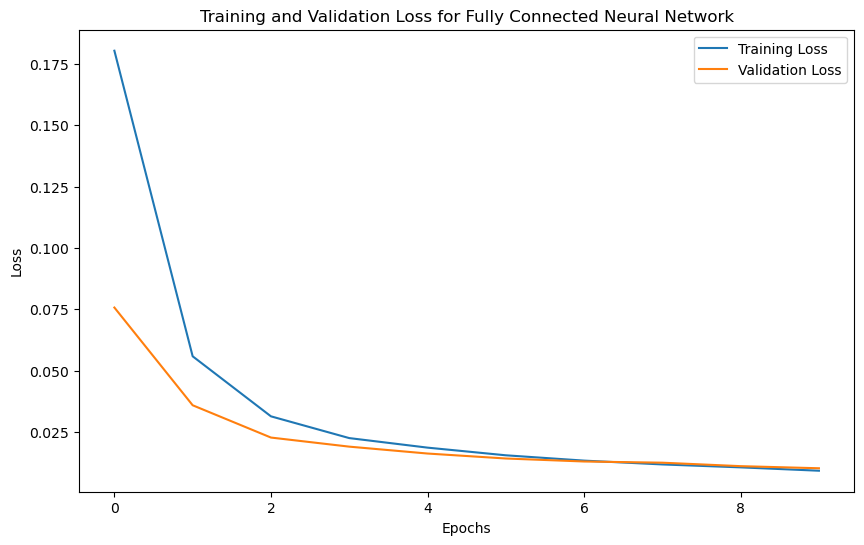

In [51]:
model_fc = Sequential([
    Flatten(input_shape=(50, 1)),  # Input shape is 50 time steps (excluding 51st)
    Dense(64, activation='relu'),  # Adjust the number of neurons as needed
    Dense(1)  # Output layer with one neuron
])

# Compiling Model
model_fc.compile(optimizer='adam', loss='mse')

# Train the model on the training data
history_fc = model_fc.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

# Evaluate the model on the testing set
test_loss_fc = model_fc.evaluate(X_test, y_test)
print("Fully Connected Neural Network - Test Loss:", test_loss_fc)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_fc.history['loss'], label='Training Loss')
plt.plot(history_fc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Fully Connected Neural Network')
plt.show()

### b) Simple RNN with one layer (output layer)

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.0417 - val_loss: 0.0122
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0049
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0051
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Simple RNN with One Layer - Test Loss: 

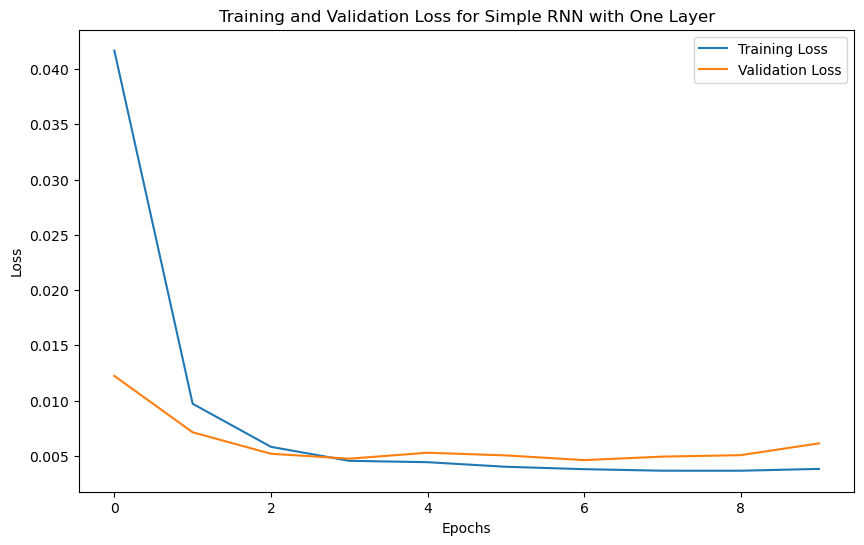

In [53]:
# Define the simple RNN model with one output layer
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(50, 1)),  # RNN layer with 64 units
    Dense(1)  # Output layer with one neuron
])
model_rnn.compile(optimizer='adam', loss='mse')

history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

test_loss_rnn = model_rnn.evaluate(X_test, y_test)
print("Simple RNN with One Layer - Test Loss:", test_loss_rnn)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Simple RNN with One Layer')
plt.show()

### c) Simple RNN with one hidden layer and one output layer.

Epoch 1/10
22/22 [==============================] - 1s 18ms/step - loss: 0.0393 - val_loss: 0.0127
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0061
Epoch 4/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 5/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 6/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 7/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 8/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 9/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Simple RNN with One Hidden Laye

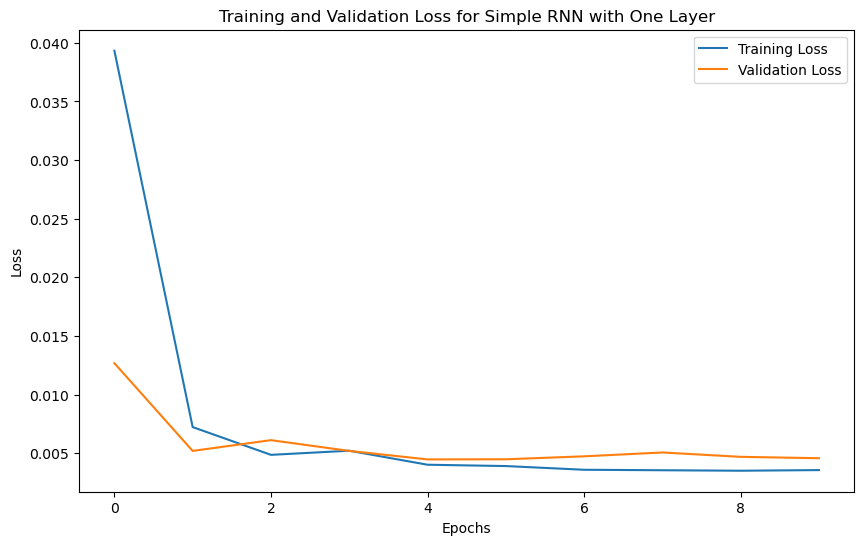

In [55]:
model_rnn_one_hidden = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(50, 1)),  # RNN layer with 64 units
    SimpleRNN(64, activation='relu'),  # Additional hidden layer
    Dense(1)  # Output layer with one neuron
])

model_rnn_one_hidden.compile(optimizer='adam', loss='mse')

history_rnn_one_hidden = model_rnn_one_hidden.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

test_loss_rnn_one_hidden = model_rnn_one_hidden.evaluate(X_test, y_test)
print("Simple RNN with One Hidden Layer - Test Loss:", test_loss_rnn_one_hidden)

plt.figure(figsize=(10, 6))
plt.plot(history_rnn_one_hidden.history['loss'], label='Training Loss')
plt.plot(history_rnn_one_hidden.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Simple RNN with One Layer')
plt.show()

### d) Simple RNN with two hidden layes and one output layer.

Epoch 1/10
22/22 [==============================] - 2s 24ms/step - loss: 0.0434 - val_loss: 0.0105
Epoch 2/10
22/22 [==============================] - 0s 14ms/step - loss: 0.0083 - val_loss: 0.0091
Epoch 3/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 4/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 5/10
22/22 [==============================] - 0s 15ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 6/10
22/22 [==============================] - 0s 16ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 7/10
22/22 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 8/10
22/22 [==============================] - 0s 16ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 9/10
22/22 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0058
Simple RNN with Two Hidden Laye

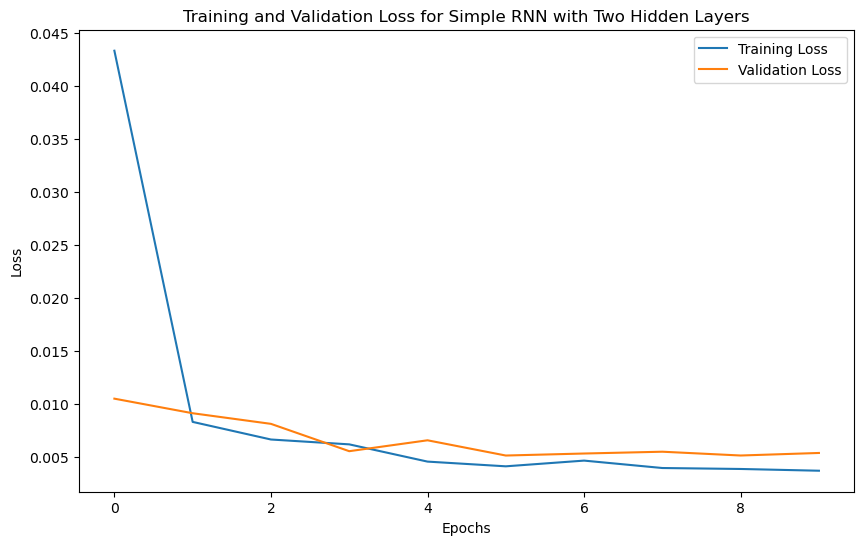

In [58]:
model_rnn_two_hidden = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(50, 1)),  # First RNN layer with 64 units
    SimpleRNN(64, activation='relu', return_sequences=True),  # Second RNN layer with 64 units
    SimpleRNN(32, activation='relu'),  # Third RNN layer with 32 units
    Dense(1)  # Output layer with one neuron
])

model_rnn_two_hidden.compile(optimizer='adam', loss='mse')

history_rnn_two_hidden = model_rnn_two_hidden.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

test_loss_rnn_two_hidden = model_rnn_two_hidden.evaluate(X_test, y_test)
print("Simple RNN with Two Hidden Layers - Test Loss:", test_loss_rnn_two_hidden)

plt.figure(figsize=(10, 6))
plt.plot(history_rnn_two_hidden.history['loss'], label='Training Loss')
plt.plot(history_rnn_two_hidden.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Simple RNN with Two Hidden Layers')
plt.show()

# Q2)  Google Stock Prediction dataset.

### Importing Necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow import keras
from tensorflow.keras import layers

### Reading the dataset

In [3]:
Data = pd.read_csv("GOOG.csv")

In [4]:
Data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


### Observing and figuring and getting insights about the data

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
Data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
Data.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [9]:
Data.shape

(1258, 14)

In [10]:
Data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [11]:
Data.dtypes

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

#### Converting it to a dataframe

In [12]:
df = pd.DataFrame(Data)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


#### Converting to datetime


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['date'] = df['date'].apply(lambda x : pd.to_datetime(x).year)

#### Dropping Symbol Column since it has no significance

In [15]:
df = df.drop('symbol',axis = 1)

#### Adjusting the dates b/w 2020 and 2021

In [16]:
df = df[(df['date'] ==2020) | (df['date'] ==2021)]

In [17]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
894,2020,1367.37,1368.140,1341.5500,1341.55,1406731,1367.37,1368.140,1341.5500,1341.55,1406731,0.0,1.0
895,2020,1360.66,1372.500,1345.5400,1347.86,1187006,1360.66,1372.500,1345.5400,1347.86,1187006,0.0,1.0
896,2020,1394.21,1396.500,1350.0000,1350.00,1733149,1394.21,1396.500,1350.0000,1350.00,1733149,0.0,1.0
897,2020,1393.34,1402.990,1390.3800,1397.94,1511693,1393.34,1402.990,1390.3800,1397.94,1511693,0.0,1.0
898,2020,1404.32,1411.580,1390.8400,1392.08,1529177,1404.32,1411.580,1390.8400,1392.08,1529177,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [19]:
# Selecting the features for input data
selected_features = ['close', 'high', 'low', 'open']

# Extracting input features (X) and target variable (y)
X = df[selected_features].to_numpy()
y = df['volume'].to_numpy()

# Standardizing the target variable (y)
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

y = np.arange(0,len(y),4)
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))
X = x.reshape(int(364/4),4,4)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


#### Building a simple RNN model

In [20]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(4, 4)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               17024     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

#### Training the model

In [21]:
history  = model.fit(X_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 161ms/step - loss: 0.8809 - val_loss: 0.8633
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.4901 - val_loss: 0.3967
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2072 - val_loss: 0.2722
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 0.3611 - val_loss: 0.2679
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2416 - val_loss: 0.2150
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1767 - val_loss: 0.3078
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2082 - val_loss: 0.3929
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2123 - val_loss: 0.3505
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1885 - val_loss: 0.2701
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1661 - val_loss: 0.2242
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1294 - val_loss: 0.3653
Epoch 85/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1328 - val_loss: 0.3498
Epoch 86/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1046 - val_loss: 0.2702
Epoch 87/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1111 - val_loss: 0.2381
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1322 - val_loss: 0.2668
Epoch 89/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0956 - val_loss: 0.3118
Epoch 90/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0948 - val_loss: 0.3471
Epoch 91/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1088 - val_loss: 0.3362
Epoch 92/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0900 - val_loss: 0.3017
Epoch 93/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1144 - val_loss: 0.2675
Epoch 94/1

#### C. Comment on how many epochs (dropouts) is required for adequate learning. 

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping with patience (number of epochs to wait for improvement)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Determine the number of epochs used
num_epochs_used = len(history.history['loss'])
print("Number of epochs used:", num_epochs_used)

Epoch 1/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.1120 - val_loss: 0.1997
Epoch 2/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1423 - val_loss: 0.1985
Epoch 3/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1526 - val_loss: 0.1957
Epoch 4/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1307 - val_loss: 0.1991
Epoch 5/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1297 - val_loss: 0.1958
Epoch 6/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1429 - val_loss: 0.1915
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1540 - val_loss: 0.1919
Epoch 8/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1408 - val_loss: 0.1894
Epoch 9/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1204 - val_loss: 0.2028
Epoch 10/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1514 - val_loss: 0.2027
Epoch 11/

#### B. Compare the accuracy using MAPE and MSE. 

In [25]:
y_actual = y_test 

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_actual, y_pred)

# Calculate MSE
mse = mean_squared_error(y_actual, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Mean Squared Error (MSE): {:.4f}".format(mse))

Mean Absolute Percentage Error (MAPE): 142.77%
Mean Squared Error (MSE): 0.1916


#### D. Plot the actual vs predicted values using the test data for the year 2020 and 2021 .

1/1 [==============================] - 0s 284ms/step


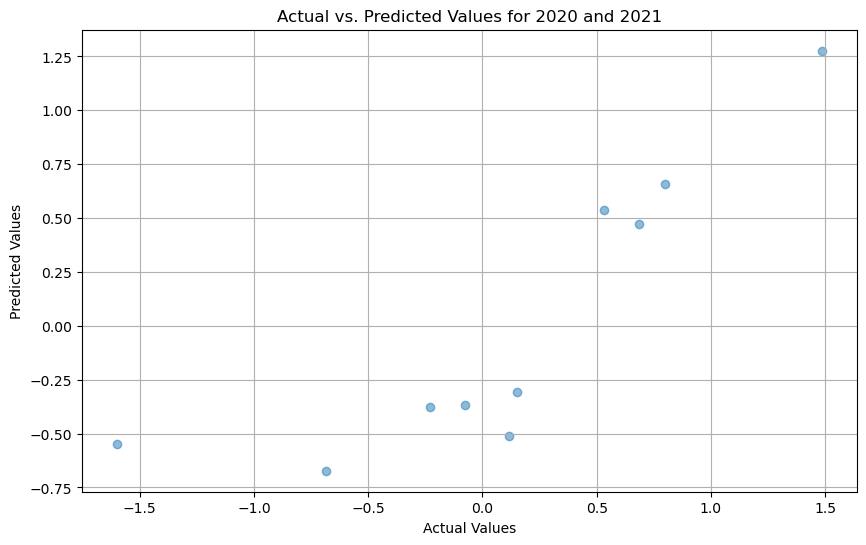

In [23]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for 2020 and 2021')
plt.grid(True)
plt.show()